#  Section 2: Structural Causal Models, Interventions, and Graphs

Python code for practical exercises in the [Causal Data Science with Direct Acyclical Graphs](https://www.udemy.com/course/causal-data-science/) Udemy course by Paul Hunermund

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

## Exercise 1: Collider bias example

In [3]:
# Create two independent normally distributed variables and combine them in a data frame
talent = np.random.normal(size=1000)

looks = np.random.normal(size=1000)

df = pd.DataFrame({'t':talent,'l':looks})

# Compute the correlation between these two variables

df.corr()

,t,l
t,1.000000,0.007763
l,0.007763,1.000000


In [4]:
# Create a third variable "job", which is equal to one if the sum
# of talent and looks is above the 75th percentile in the population
x = talent + looks

df['job'] = 1*(x > np.quantile(x, .75))

df.loc[df['job']==1][['t','l']].corr()

,t,l
t,1.00000,-0.58314
l,-0.58314,1.00000


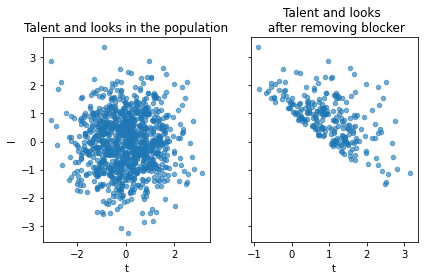

In [5]:
fig,ax= plt.subplots(ncols=2,sharey=True)

df.plot.scatter(x='t',y='l',ax=ax[0],title='Talent and looks in the population',alpha=0.6)

df.loc[df['job']==1].plot.scatter(x='t',y='l',ax=ax[1],
                                  title='Talent and looks \n after removing blocker',alpha=0.6)

plt.tight_layout()

## Exercise 2: Correlation doesn't imply causation

In the following simulations, I will restrict attention to binary variables. This has two distinct advantages. First, for binary variables probabilities are equal to means, so they are easy to compute. Second, computing conditional probabilities is particularly easy with
binary variables and the code does not become unnecessarily cluttered.


In [6]:
# Create background factors for nodes
e_x,e_y,e_z = [np.random.normal(size=1000) for n in np.arange(0,3)] 

# Create nodes for the DAG: y <- x, y <- z, x <- z  
z = 1*(e_z > 0)
x = 1*(z + e_x > 0.5)
y = 1*(x + z + e_y > 2)
y_dox = 1*(1 + z + e_y > 2)

# We see that P(y|do(x=1)) is not equal to P(y|x=1)
print(np.mean(y_dox))
print(np.mean(y[x==1]))


0.314
0.3558648111332008


## Exercise 3: Visualising a DAG with NetworkX

In [7]:
#We have to import some functions to create the dag

os.chdir('..')

from scripts.make_dag import *

In [8]:
node_df = pd.DataFrame({'x':[0,2,1,0,0,2,2,1],'y':[0,0,1,1,2,2,1,0],
                              'label':['x','y','z1','z2','z3','z4','z5','z6']})

edges_labelled = [('z5','y'),('z6','y'),('z1','y'),('x','z6'),('z4','z5'),('z3','z2'),('z4','z1'),('z3','z1'),('z2','x'),('z1','x')]

In [9]:
dag = Dag(node_df,edges_labelled)

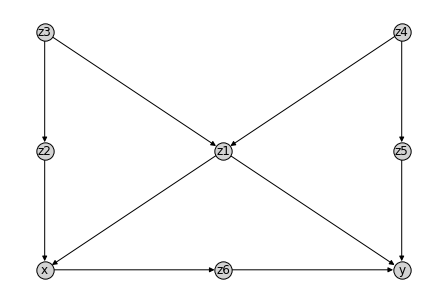

In [10]:
dag.plot_dag()

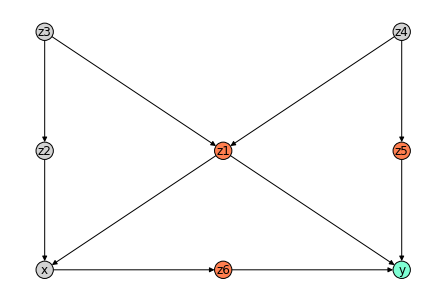

In [11]:
dag.plot_parents('y')

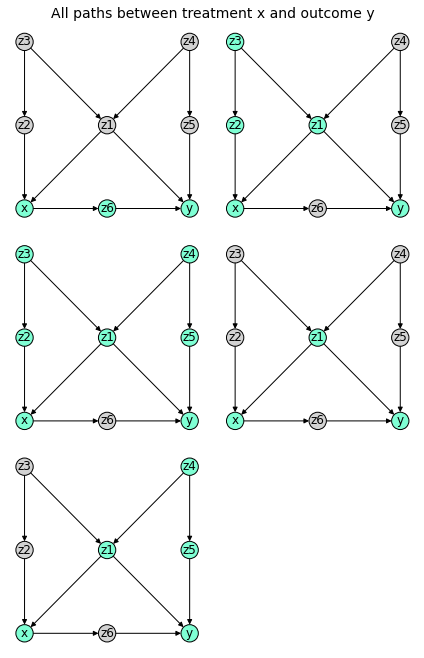

In [12]:
dag.plot_paths()